In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf


In [15]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [16]:
# Load dataset
data = load_breast_cancer()

X = data.data
y = data.target

print("Shape of features:", X.shape)
print("Shape of labels:", y.shape)
print("Target classes:", data.target_names)



Shape of features: (569, 30)
Shape of labels: (569,)
Target classes: ['malignant' 'benign']


In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [18]:
# Define feedforward neural network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)), # first hidden layer
    Dense(16, activation='relu'),  # second hidden layer
    Dense(1, activation='sigmoid')  # output layer for binary classification
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Users\RenuSingh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7527 - loss: 0.5652 - val_accuracy: 0.7912 - val_loss: 0.4868
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8901 - loss: 0.4001 - val_accuracy: 0.8681 - val_loss: 0.3645
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9203 - loss: 0.2959 - val_accuracy: 0.9121 - val_loss: 0.2831
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9451 - loss: 0.2292 - val_accuracy: 0.9560 - val_loss: 0.2293
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9615 - loss: 0.1841 - val_accuracy: 0.9560 - val_loss: 0.1941
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9643 - loss: 0.1530 - val_accuracy: 0.9560 - val_loss: 0.1689
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9725 - loss: 0.1322 - val_accuracy: 0.9670 - val_loss: 0.1506
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9698 - loss: 0.1169 - val_accuracy: 0.9670 - val_loss

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Accuracy: 0.956140350877193
Precision: 0.9855072463768116
Recall: 0.9444444444444444
F1-score: 0.9645390070921985

Classification Report:
               precision    recall  f1-score   support

   malignant       0.91      0.98      0.94        42
      benign       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



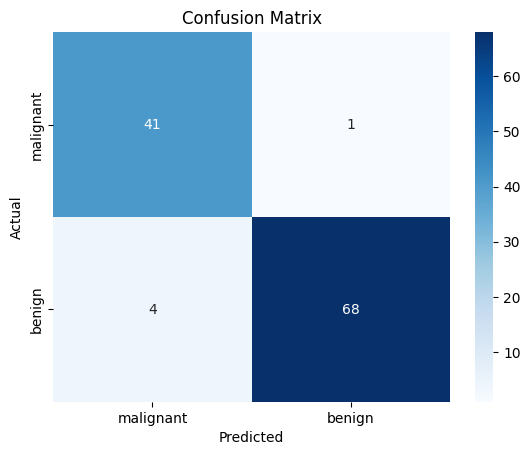

In [20]:
# Predictions
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


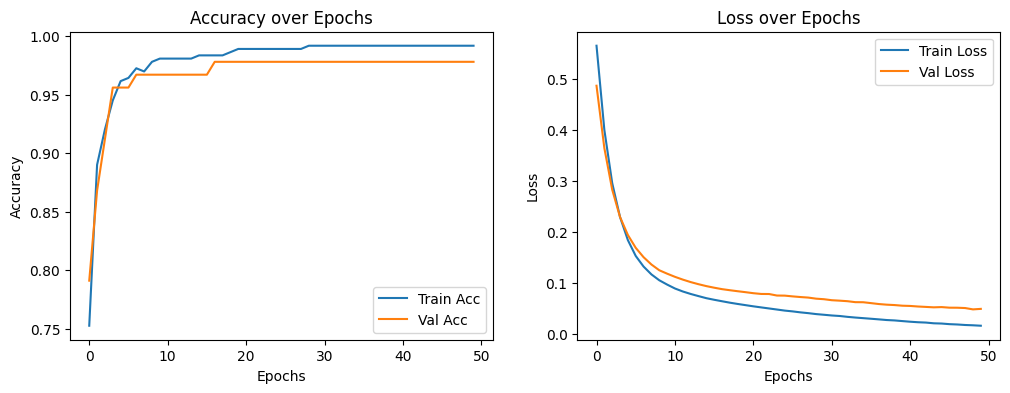

In [21]:
# Plot training history
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [22]:
print("=== Breast Cancer Classification with Neural Networks ===\n")

# 1. LOAD THE DATASET
# ===================
print("1. Loading the Breast Cancer dataset...")
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (0: malignant, 1: benign)

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Target classes: {data.target_names}")
print(f"Class distribution: {np.bincount(y)}")
print("Explanation: We loaded the breast cancer dataset which contains 30 features")
print("extracted from digitized images of breast mass. The target is binary:")
print("0 = malignant, 1 = benign\n")

=== Breast Cancer Classification with Neural Networks ===

1. Loading the Breast Cancer dataset...
Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569
Target classes: ['malignant' 'benign']
Class distribution: [212 357]
Explanation: We loaded the breast cancer dataset which contains 30 features
extracted from digitized images of breast mass. The target is binary:
0 = malignant, 1 = benign

